# Week 7 Pre-Lab: Filtering Sessions and Units for VIP Neurons in the Visual Cortex

### Names: Nik Sachdeva, Tamilore Kolawole, Annelle McNair, Husna Kider


### Date: 2/22/2022


### PIDs: 730272545, 730322641, 730229248, 730401081


### Jupyter Notebook Number: 4

## Purpose/Objective:
This week our objective is to filter sessions and units corresponding to male and female VIP-Cre genotypes in the visual cortex from Neuropixels data. In order to find Unit IDs corresponding to VIP+ cells, we will undergo optotagging analysis to identify the types of optotagging stimuli used by the Allen Institute, align spikes to light pulses, and create an array of Unit IDs representing units with a light-evoked increase in firing rate. Additionally, we will troubleshoot code that does not run. 

## Protocol:
1. Install/upgrade pip, install allensdk, import necessary libraries
2. Filter sesssions data for male and female subjects with a VIP genotype within the primary visual cortex.
3. Compare optotagging stimuli conditions and filter experiments to determine which ones incorporated a laser.
4. Align spikes to light pusles by returning a DataArray  
5. Create an array of Unit IDs for the subset of units with light-evoked increases in firing rate.


## Expected Results:
We expect to output tables of data corresponding to filtered sessions for male and female VIP genotype data in the primary visual cortex region. In addition, we expect to output tables showing the optotagging stimuli conditions used for a particular VIP session as well as output an array identifying which experiments used a laser instead of an LED. A plot showing the average firing rate over time for units from the visual cortex  will also be expected to output. Finally, we expect to plot the subset of units with a light-evoked increase in firing rate, and return an array of these VIP+ units.

### Installing AllenSDK into your local environment. 

In [ ]:
pip install --upgrade pip

In [1]:
pip install allensdk

Defaulting to user installation because normal site-packages is not writeable
  Using cached ruamel.yaml-0.17.21-py3-none-any.whl (109 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
deeplabcut 2.1.6.2 requires h5py~=2.7, but you have h5py 3.6.0 which is incompatible.
deeplabcut 2.1.6.2 requires matplotlib==3.0.3, but you have matplotlib 3.1.1 which is incompatible.
deeplabcut 2.1.6.2 requires numpy==1.16.4, but you have numpy 1.21.5 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


### Import Packages:

In [2]:
import os
import shutil
import allensdk
import pprint
from pathlib import Path

import numpy as np
import scipy.stats
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

### If working with Visual Coding: Neuropixels Data use the following code block to import the cache object and point it to the data already downloaded and stored on LongLeaf.  Do not change this code.

The following code block was run because our group will be looking at neuropixel data. The code for two-photon imaging was not run.

In [3]:
#this code block should only be run if you are working with the neuropixels data
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

data_directory = '/overflow/NSCI274/projects/ecephysdata/' 

manifest_path = os.path.join(data_directory, "manifest.json")

cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

### If working with Visual Coding: 2P Ca2+ Imaging Data use the following code block to import the cache object and point it to the data already downloaded and stored on LongLeaf.  Do not change this code.

THE BELOW CODE CELL WAS NOT RUN.

In [ ]:
#this code block should only be run if you are working with the brain observatory Ca2+ imaging data
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

drive_path = '/overflow/NSCI274/projects/BrainObservatoryOPhysData/'

manifest_file = os.path.join(drive_path,'manifest.json')

boc = BrainObservatoryCache(manifest_file=manifest_file)

### If working with Visual Behavior: 2P Ca2+ Imaging Data use the following code block to import the cache object and point it to the data already downloaded and stored on LongLeaf.  Do not change this code.

THE BELOW CODE CELL WAS NOT RUN.

In [ ]:
#this code block should only be run if you are working with the visual behavior Ca2+ imaging data
from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache

data_storage_directory = Path("/overflow/NSCI274/projects/ophysdata")

cache = VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=data_storage_directory)

## Filtering Sessions For Males and Females


### Research Proposal
    "examining sex differences in the detection of novel images by VIP inhibitory neurons in the mouse visual cortex"


The following code cell delineates the regions of the brain as provided in the dataset.

In [ ]:
regions = ['V1','LM','RL','AL','PM','AM']

The following code cell's purpose is filtering for gender differences/which neurons we are targeting in the primary visual cortex.

In [4]:
sessions = cache.get_session_table()

print('Total number of sessions: ' + str(len(sessions)))

sessions.head()

Total number of sessions: 58


,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,"[MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ..."
732592105,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt,824,1847,5,"[grey, VISpm, nan, VISp, VISl, VISal, VISrl]"
737581020,2019-10-03T00:00:00Z,718643567,brain_observatory_1.1,108.0,M,wt/wt,568,2218,6,"[grey, VISmma, nan, VISpm, VISp, VISl, VISrl]"


In [5]:
filtered_sessions_male_target_VISp = sessions[(sessions.sex == 'M') & \
                             (sessions.full_genotype.str.find('Vip') > -1) & \
                             (sessions.session_type == 'brain_observatory_1.1') & \
                             (['VISp' in acronyms for acronyms in 
                               sessions.ecephys_structure_acronyms])]
print('Total number of sessions: ' + str(len(filtered_sessions_male_target_VISp)))
filtered_sessions_male_target_VISp.head()

Total number of sessions: 3


,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
755434585,2019-10-03T00:00:00Z,730760270,brain_observatory_1.1,100.0,M,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,650,2220,6,"[grey, VISrl, nan, MGv, MGd, TH, LGd, CA3, DG,..."
762120172,2019-10-03T00:00:00Z,745276236,brain_observatory_1.1,100.0,M,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,717,1860,5,"[grey, VISal, nan, VISl, VISp, VIS, VISam]"
791319847,2019-10-03T00:00:00Z,769360779,brain_observatory_1.1,116.0,M,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,555,2229,6,"[APN, DG, CA1, VISam, nan, LP, TH, VISpm, POL,..."


In [6]:
filtered_sessions_female_target_VISp = sessions[(sessions.sex == 'F') & \
                             (sessions.full_genotype.str.find('Vip') > -1) & \
                             (sessions.session_type == 'brain_observatory_1.1') & \
                             (['VISp' in acronyms for acronyms in 
                               sessions.ecephys_structure_acronyms])]
print('Total number of sessions: ' + str(len(filtered_sessions_female_target_VISp)))
filtered_sessions_female_target_VISp.head()

Total number of sessions: 2


,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
751348571,2019-10-03T00:00:00Z,732548380,brain_observatory_1.1,93.0,F,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,859,2217,6,"[grey, LGv, CA3, DG, CA1, VISl, nan, APN, POL,..."
798911424,2019-10-03T00:00:00Z,775876828,brain_observatory_1.1,110.0,F,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,825,2233,6,"[APN, TH, Eth, LP, DG, HPF, CA3, CA1, VISrl, n..."


## Identifying VIP+ Cells From Optotagging Data


The following code contains info about the genotypes of mice used in each experiment from the Allen Insitute. We are particlarly interested in the VIP sessions.

In [7]:
sessions = cache.get_session_table()

sessions.full_genotype.value_counts()

wt/wt                                              30
Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt      12
Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt     8
Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt       8
Name: full_genotype, dtype: int64

The following code filters the sessions table above in order to identify experiments performed on VIP-Cre mice.

In [8]:
vip_sessions = sessions[sessions.full_genotype.str.match('Vip')]

vip_sessions

,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
751348571,2019-10-03T00:00:00Z,732548380,brain_observatory_1.1,93.0,F,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,859,2217,6,"[grey, LGv, CA3, DG, CA1, VISl, nan, APN, POL,..."
755434585,2019-10-03T00:00:00Z,730760270,brain_observatory_1.1,100.0,M,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,650,2220,6,"[grey, VISrl, nan, MGv, MGd, TH, LGd, CA3, DG,..."
762120172,2019-10-03T00:00:00Z,745276236,brain_observatory_1.1,100.0,M,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,717,1860,5,"[grey, VISal, nan, VISl, VISp, VIS, VISam]"
791319847,2019-10-03T00:00:00Z,769360779,brain_observatory_1.1,116.0,M,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,555,2229,6,"[APN, DG, CA1, VISam, nan, LP, TH, VISpm, POL,..."
798911424,2019-10-03T00:00:00Z,775876828,brain_observatory_1.1,110.0,F,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,825,2233,6,"[APN, TH, Eth, LP, DG, HPF, CA3, CA1, VISrl, n..."
816200189,2019-10-03T00:00:00Z,791857608,functional_connectivity,128.0,F,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,634,1857,5,"[MRN, APN, MB, DG, CA1, VISam, nan, LP, VISpm,..."
819701982,2019-10-03T00:00:00Z,795770036,functional_connectivity,135.0,F,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,585,1852,5,"[MB, SCiw, SCig, PPT, NOT, SUB, ProS, CA1, VIS..."
835479236,2019-10-03T00:00:00Z,813701562,functional_connectivity,121.0,M,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,582,1857,5,"[LP, DG, CA1, VISmmp, nan, SCiw, SCig, SCop, S..."


In order to extract information about the optotagging stimuli that were delivered, the following code loads one of the VIP sessions above and returns a table showing info about each optotagging trial.

In [9]:
session = cache.get_session_data(vip_sessions.index.values[-3])
session.optogenetic_stimulation_epochs

,start_time,condition,level,stop_time,stimulus_name,duration
id,,,,,,
0,9208.77074,a single square pulse,1.3,9208.78074,pulse,0.010
1,9210.75084,2.5 ms pulses at 10 Hz,1.3,9211.75084,fast_pulses,1.000
2,9212.69089,a single square pulse,2.0,9212.70089,pulse,0.010
3,9214.77096,2.5 ms pulses at 10 Hz,1.3,9215.77096,fast_pulses,1.000
4,9216.70105,a single square pulse,1.3,9216.71105,pulse,0.010
...,...,...,...,...,...,...
604,10525.66080,a single square pulse,1.3,10525.66580,pulse,0.005
605,10527.58090,half-period of a cosine wave,1.3,10528.58090,raised_cosine,1.000
606,10529.41093,a single square pulse,1.3,10529.42093,pulse,0.010


The following code returns a table showing the unique optotagging stimuli conditions across all trials.

In [10]:
columns = ['stimulus_name', 'duration','level']

session.optogenetic_stimulation_epochs.drop_duplicates(columns).sort_values(by=columns).drop(columns=['start_time','stop_time'])


,condition,level,stimulus_name,duration
id,,,,
1,2.5 ms pulses at 10 Hz,1.3,fast_pulses,1.000
25,2.5 ms pulses at 10 Hz,1.7,fast_pulses,1.000
20,2.5 ms pulses at 10 Hz,2.0,fast_pulses,1.000
38,a single square pulse,1.3,pulse,0.005
11,a single square pulse,1.7,pulse,0.005
6,a single square pulse,2.0,pulse,0.005
0,a single square pulse,1.3,pulse,0.010
9,a single square pulse,1.7,pulse,0.010
2,a single square pulse,2.0,pulse,0.010


Since the Allen Institute switched from delivering light through an LED to a laser a little more than halfway through their data collections, the following code filters experiments to determine which ones used a laser. A laser evokes a stronger optotagging response than an LED.

In [11]:
sessions.index.values >= 751348571

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

For a certain stimulus condition (10 ms pulses) and set of units (visual cortex only), the following code creates a DataArray with binned spikes aligned to the start of each stimulus. This code did not run correctly and will have to be troubleshooted in lab.

In [13]:
import xarray as xr
trials = session.optogenetic_stimulation_epochs[(session.optogenetic_stimulation_epochs.duration > 0.009) & \
                                                (session.optogenetic_stimulation_epochs.duration < 0.02)]

units = session.units[session.units.ecephys_structure_acronym.str.match('VIS')]

time_resolution = 0.0005 # 0.5 ms bins

bin_edges = np.arange(-0.01, 0.025, time_resolution)

def optotagging_spike_counts(bin_edges, trials, units):
    
    time_resolution = np.mean(np.diff(bin_edges))

    spike_matrix = np.zeros( (len(trials), len(bin_edges), len(units)) )

    for unit_idx, unit_id in enumerate(units.index.values):

        spike_times = session.spike_times[unit_id]

        for trial_idx, trial_start in enumerate(trials.start_time.values):

            in_range = (spike_times > (trial_start + bin_edges[0])) * \
                       (spike_times < (trial_start + bin_edges[-1]))

            binned_times = ((spike_times[in_range] - (trial_start + bin_edges[0])) / time_resolution).astype('int')
            spike_matrix[trial_idx, binned_times, unit_idx] = 1

    return xr.DataArray(
        name='spike_counts',
        data=spike_matrix,
        coords={
            'trial_id': trials.index.values,
            'time_relative_to_stimulus_onset': bin_edges,
            'unit_id': units.index.values
        },
        dims=['trial_id', 'time_relative_to_stimulus_onset', 'unit_id']
    )

da = optotagging_spike_counts(bin_edges, trials, units)

The following code uses the DataArray from above to plot the average firing rate for each unit over time. Given that the DataArray from the above code did not run, the following code also shows an error.

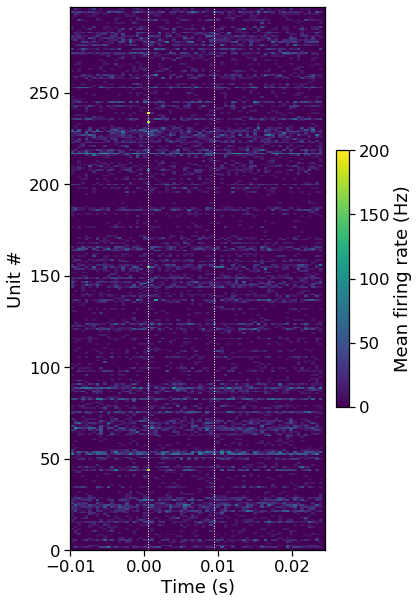

In [14]:
def plot_optotagging_response(da):

    plt.figure(figsize=(5,10))

    plt.imshow(da.mean(dim='trial_id').T / time_resolution, 
               extent=[np.min(bin_edges), np.max(bin_edges),
                       0, len(units)],
               aspect='auto', vmin=0, vmax=200)    

    for bound in [0.0005, 0.0095]:
        plt.plot([bound, bound],[0, len(units)], ':', color='white', linewidth=1.0)

    plt.xlabel('Time (s)')
    plt.ylabel('Unit #')

    cb = plt.colorbar(fraction=0.046, pad=0.04)
    cb.set_label('Mean firing rate (Hz)')
    
plot_optotagging_response(da)

## Identifying Cre+ units

In [15]:
baseline = da.sel(time_relative_to_stimulus_onset=slice(-0.01,-0.002))

baseline_rate = baseline.sum(dim='time_relative_to_stimulus_onset').mean(dim='trial_id') / 0.008

evoked = da.sel(time_relative_to_stimulus_onset=slice(0.001,0.009))

evoked_rate = evoked.sum(dim='time_relative_to_stimulus_onset').mean(dim='trial_id') / 0.008

The following code searches for units that increase their firing rate during the 10 ms pulse using the DataArray from above, and then creates a plot of these units. The following code also returns an error since the DataArray code did not run.

In [16]:
baseline = da.sel(time_relative_to_stimulus_onset=slice(-0.01,-0.002))

baseline_rate = baseline.sum(dim='time_relative_to_stimulus_onset').mean(dim='trial_id') / 0.008

evoked = da.sel(time_relative_to_stimulus_onset=slice(0.001,0.009))

evoked_rate = evoked.sum(dim='time_relative_to_stimulus_onset').mean(dim='trial_id') / 0.008

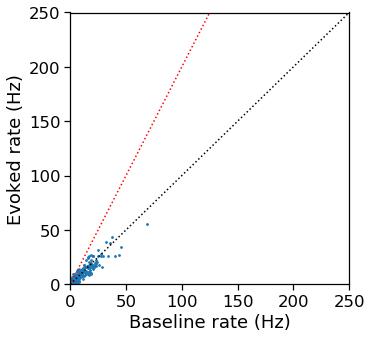

In [17]:
plt.figure(figsize=(5,5))

plt.scatter(baseline_rate, evoked_rate, s=3)

axis_limit = 250
plt.plot([0,axis_limit],[0,axis_limit], ':k')
plt.plot([0,axis_limit],[0,axis_limit*2], ':r')
plt.xlim([0,axis_limit])
plt.ylim([0,axis_limit])

plt.xlabel('Baseline rate (Hz)')
_ = plt.ylabel('Evoked rate (Hz)')

The following code will create an array of Unit IDs for VIP+ units for a certain threshold (a 2 times increase in firing rate). It does not run because the DataArray code did not run. Additionally, we will have to edit our code to create one array of Unit IDs for each sex.

In [18]:
cre_pos_units = da.unit_id[(evoked_rate / (baseline_rate + 1)) > 2].values # add 1 to prevent divide-by-zero errors

cre_pos_units

array([951139070, 951139608, 951139999, 951147908, 951148243, 951160317])

## Resources:
Optotagging analysis code was from Optotagging Analysis from the Allen Institute for Brain Science: https://allensdk.readthedocs.io/en/latest/_static/examples/nb/ecephys_optotagging.html

Markdown text and code for this Jupyter notebook were from the Neuropixels Visual Coding Tutorial from Allen Institute for Brain Science: https://github.com/AllenInstitute/brain_observatory_examples/blob/master/Open%20for%20NeuroScience%202020/Open%20for%20(Neuro)Science%202021%20-%20Neuropixels%20Visual%20Coding%20ANSWER%20KEY.ipynb


Siegle et al., 2021: https://github.com/AllenInstitute/neuropixels_platform_paper/blob/master/Figure1/Figure1c.py

### Sample Allen Jupyter Notebooks to get started:
https://allensdk.readthedocs.io/en/latest/visual_behavior_optical_physiology.html
https://allensdk.readthedocs.io/en/latest/visual_coding_neuropixels.html